Before you submit this tick, make sure everything runs as expected. First, **save your work** (in the menubar, select File$\rightarrow$Save and Checkpoint). Then **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and remove any instances of `failwith "Not implemented";;`


---

In [2]:
#require "focs";;

# FoCS Tick 5: A Tiny Graphics Package (Vacation)

*This exercise is compulsory for CST candidates. Although optional for NST or PBS students, it is recommended for experience.*

Portable pixmap format (PPM) is an extremely simple image file format, where an image of a specified width $w$ and height $h$ is given by a text file containing $h$ lines, each $w$ pixels across. Each pixel is specified by three integers according to the RGB colour model. Each integer ranges from 0 to 255. Here are a few representative examples:

| R   |   G |   B | Colour    |
|-----|-----|-----|-----------|
| 0   |   0 |   0 | Black     |
| 255 |   0 |   0 | Red       |
| 0   | 255 |   0 | Green     |
| 0   |   0 | 255 | Blue      |
| 255 | 255 | 0   | Yellow    |
| 255 |   0 | 255 | Magenta   |
| 0   | 255 | 255 | Cyan      |
| 255 | 255 | 255 | White     |  
| 100 | 100 | 100 |  Dark Grey|
| 200 | 200 | 200 | Light Grey|

A valid PPM file has a 3 line header: the word `P3` on the first; the width and height in pixels on the second; and the maximum pixel value (`255` here) on the third. Thereafter each line represents a row of pixels. Spaces are used to separate colour values and pixels. Here is an example for a very small (3x3) file that has all nine pixels set to $(1, 10, 100)$:

```
P3
3 3
255
   1  10 100   1  10 100   1  10 100
   1  10 100   1  10 100   1  10 100
   1  10 100   1  10 100   1  10 100
```

Although not strictly required, the values in this example are formatted in blocks of four characters, which helps when visually inspecting the file (the numbers align). So, `1` gets three padding spaces, `10` gets two, etc. Because the maximum value is `255`, there is never a complete block of four and the data for one pixel just follows straight after the data for the last (i.e. no further spacing added). The code you write in this tick should produce files with this same padding. Note that the file should end on a blank line (i.e. every line with text should end with a new line).

The task is to represent such images using OCaml arrays and to implement some operations on them. You must use the following types:

In [3]:
type colour = int * int * int (* RGB colour components, 0..255 *)
type xy = int * int (* points (x,y) and sizes (w,h) *)
type image = Image of xy * colour array array
let getPixel (x,y) (Image (_,arr)) = arr.(y).(x);;

type colour = int * int * int


type xy = int * int


type image = Image of xy * colour array array


val getPixel : int * int -> image -> colour = <fun>


1. Implement OCaml functions `image`, `size` and `drawPixel` as follows:

   - The function `image`, given a dimension $w \times h$, should create an OCaml array consisting of `h` elements
     to represent the rows, where each row is itself an OCaml array consisting out of `w` elements of type colour.
     Each pixel should be given the supplied colour. Remember that arrays are mutable objects, so each row needs
     to be a distinct array; you may find the function Array.create useful for this.

   - The function `size` should return the dimensions of the given image as a pair $(w, h)$.
 
   - The function `drawPixel`, given a specified image, sets a pixel to the specified color at the given $(x, y)$
     position. Here $0 ≤ x < w$ and $0 ≤ y < h$.
  

In [35]:
let image (w,h) c =
    Image ((w,h), Array.init h (fun _ -> Array.make w c))

let size img = match img with
    Image (dim, _) -> dim

let drawPixel (x,y) c img = match img with
    Image (_, arr) -> Array.set (Array.get arr y) x c

val image : int * int -> colour -> image = <fun>


val size : image -> xy = <fun>


val drawPixel : int * int -> colour -> image -> unit = <fun>


In [36]:
let i = image (10,10) (0,0,0);;
assert(size i = (10,10));;
drawPixel (3,2) (10,10,10) i;;
assert(getPixel (3,2) i = (10,10,10));;

val i : image = 


- : unit = ()


- : unit = ()


- : unit = ()


2. Implement a function `toPPM` to convert an `image` into a string containing the PPM representation. You may find `Array.iter` helpful; it applies a given function to every element of an array. Print rows of the image in order. (This means that increasing values of y refer to pixels further down, not up as you would expect with Cartesian coordinates.) The skeleton code below works by creating a mutable `Buffer`, appending strings to it using `bprintf`, and finally getting the contents back as a string via `Buffer.contents`. You may find it useful to refer to the documentation of `printf` available [here](https://caml.inria.fr/pub/docs/manual-ocaml/libref/Printf.html). For example, to pad the red, green and blue colour values to 4 spaces, use the format string `"% 4d"`.

In [15]:
let toPPM = function
    | Image (xy,pixels) ->
        let buf = Buffer.create 1000 in
        Printf.bprintf buf "P3\n";
        match xy with (x,y) -> Printf.bprintf buf "%d %d\n" x y;
        Printf.bprintf buf "255\n";
        Array.iter (fun arr -> Array.iter (fun (r,g,b) -> Printf.bprintf buf "% 4d% 4d% 4d" r g b) arr; Printf.bprintf buf "\n") pixels;
        Buffer.contents buf

val toPPM : image -> string = <fun>


To verify your code is producing the correct output, use the following test:

In [16]:
let i = image (3,3) (1,10,100);;
let str = toPPM i;;
let expected = {|P3
3 3
255
   1  10 100   1  10 100   1  10 100
   1  10 100   1  10 100   1  10 100
   1  10 100   1  10 100   1  10 100
|};;
assert(str = expected)

val i : image =
  Image ((3, 3),
   [|[|(1, 10, 100); (1, 10, 100); (1, 10, 100)|];
     [|(1, 10, 100); (1, 10, 100); (1, 10, 100)|];
     [|(1, 10, 100); (1, 10, 100); (1, 10, 100)|]|])


val str : string =
  "P3\n3 3\n255\n   1  10 100   1  10 100   1  10 100\n   1  10 100   1  10 100   1  10 100\n   1  10 100   1  10 100   1  10 100\n"


val expected : string =
  "P3\n3 3\n255\n   1  10 100   1  10 100   1  10 100\n   1  10 100   1  10 100   1  10 100\n   1  10 100   1  10 100   1  10 100\n"


- : unit = ()


To render the images, the function `Focs.Ppm.printer` can be used to display the image in the Jupyter notebook:

val i : image =
  Image ((100, 100),
   [|[|(0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, 0, 255);
       (0, 0, 255); (0, 0, 255); (0, 0, 255); (0, ...); ...|];
     ...|])


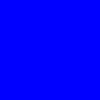

- : unit = ()


In [17]:
let i = image (100,100) (0,0,255);;
Focs.Ppm.printer (toPPM i)

This can be installed as a custom printer:

val printer : image -> unit = <fun>


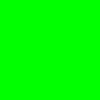

- : image = 


In [18]:
let printer image = Focs.Ppm.printer (toPPM image);;
#install_printer printer;;
image (100,100) (0,255,0);;

3. Implement the ML functions `drawHoriz`, `drawVert` and `drawDiag`. The first draws a horizontal line to the right from the given starting point; the second draws a vertical line downwards; the third draws a diagonal line to the right and down. In each case, the length of the line in pixels is given as an integer. (Note: the return type of these functions is unit since they affect the input image and therefore have nothing to return).

In [32]:
let rec drawHoriz image c xy len = match image, len, xy with
    | _, 0, _ -> ()
    | Image (_, arr), l, (x,y) -> arr.(y).(x) <- c; drawHoriz image c (x+1,y) (len-1)

let rec drawVert image c xy len = match image, len, xy with
    | _, 0, _ -> ()
    | Image (_, arr), l, (x,y) -> arr.(y).(x) <- c; drawVert image c (x,y+1) (len-1)

let rec drawDiag image c xy len = match image, len, xy with
    | _, 0, _ -> ()
    | Image (_, arr), l, (x,y) -> arr.(y).(x) <- c; drawDiag image c (x+1,y+1) (len-1)



val drawHoriz : image -> colour -> int * int -> int -> unit = <fun>


val drawVert : image -> colour -> int * int -> int -> unit = <fun>


val drawDiag : image -> colour -> int * int -> int -> unit = <fun>


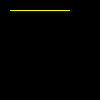

val i1 : image = 


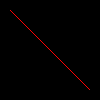

val i2 : image = 


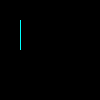

val i3 : image = 


val tests_i1 : ((int * int) * (int * int * int)) list =
  [((20, 10), (255, 255, 0)); ((21, 11), (0, 0, 0));
   ((69, 10), (255, 255, 0)); ((70, 10), (0, 0, 0))]


val tests_i2 : ((int * int) * (int * int * int)) list =
  [((15, 15), (255, 0, 0)); ((16, 15), (0, 0, 0)); ((89, 89), (255, 0, 0));
   ((90, 90), (0, 0, 0))]


val tests_i3 : ((int * int) * (int * int * int)) list =
  [((20, 21), (0, 255, 255)); ((21, 21), (0, 0, 0));
   ((20, 49), (0, 255, 255)); ((20, 50), (0, 0, 0))]


val test_image : image -> ((int * int) * colour) list -> unit = <fun>


- : unit = ()


In [37]:
let i1 = let i = image (100,100) (0,0,0) in drawHoriz i (255,255,0) (10,10) 60; i;;
let i2 = let i = image (100,100) (0,0,0) in drawDiag i (255,0,0) (10,10) 80; i;;
let i3 = let i = image (100,100) (0,0,0) in drawVert i (0,255,255) (20,20) 30; i;;
let tests_i1 = [
 (20,10),(255,255,0);
 (21,11),(0,0,0);
 (69,10),(255,255,0);
 (70,10),(0,0,0);
]
let tests_i2 = [
 (15,15),(255,0,0);
 (16,15),(0,0,0);
 (89,89),(255,0,0);
 (90,90),(0,0,0);
]
let tests_i3 = [
 (20,21),(0,255,255);
 (21,21),(0,0,0);
 (20,49),(0,255,255);
 (20,50),(0,0,0);
]
let test_image image pixels =
    List.iter (fun (xy,rgb) -> assert(getPixel xy image = rgb)) pixels;;
test_image i1 tests_i1;
test_image i2 tests_i2;
test_image i3 tests_i3;


Implement a function `drawLine` to draw a line from one pixel position to another. Use Bresenham's line algorithm, which can be expressed by the following pseudo-code:

```
function line(x0, y0, x1, y1)
  dx := abs(x1-x0)
  dy := abs(y1-y0)
  if x0 < x1 then sx := 1 else sx := -1
  if y0 < y1 then sy := 1 else sy := -1
  err := dx-dy
  loop
    setPixel(x0,y0)
    if x0 = x1 and y0 = y1 exit loop
    e2 := 2*err
    if e2 > -dy then err := err - dy
      x0 := x0 + sx
    end if
    if e2 < dx then
      err := err + dx
      y0 := y0 + sy
    end if
  end loop
```

You may be tempted to translate this into OCaml making heavy use of reference types. It’s actually simpler to implement the loop as a recursive function taking three arguments x, y and err. The integer absolute value is available as the function `abs`.


In [44]:
let drawLine image colour start finish = match image, start, finish with
    | Image(_, arr), (x0, y0), (x1, y1) ->
        let abs x = if x<0 then x*(-1) else x in
        let sx = if x0<x1 then 1 else (-1) in
        let sy = if y0<y1 then 1 else (-1) in
        let dx = abs (x1-x0) in
        let dy = abs (y1-y0) in
        let update1 (x, y, err, e2) = if e2 > -dy then (x+sx, y, err-dy, e2) else (x,y,err,e2) in
        let update2 (x, y, err, e2) = if e2 < dx then (x, y+sy, err+dx, e2) else (x,y,err,e2) in
        let rec hlp x y err = 
            arr.(y).(x) <- colour;
            if x=x1 && y=y1 then ()
            else
                let e2 = 2*err in
                match update2 (update1 (x, y, err, e2)) with
                    | (x, y, err, _) -> hlp x y err
        in hlp x0 y0 (dx-dy)

val drawLine : image -> colour -> int * int -> int * int -> unit = <fun>


The following may be used to test your `drawLine` function, which should produce a pattern. You can see the expected pattern [here](https://raw.githubusercontent.com/jonludlam/focs-support/master/share/pattern-reference.png)

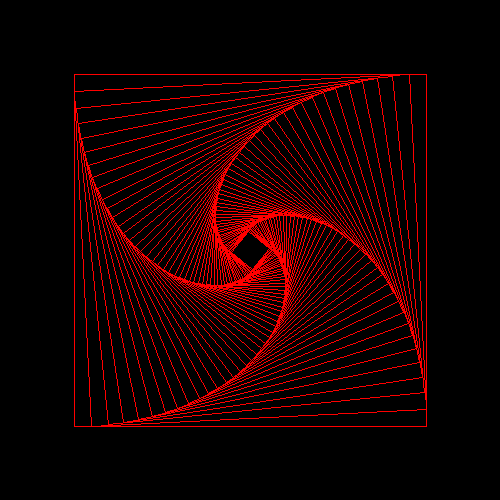

val img : image = 


val reference : string =
  "P3\n500 500\n255\n   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0"... (* string length 3000515; truncated *)


- : unit = ()


In [45]:
let img =
    let img = image (500,500) (0,0,0) in
    let square (x0,y0) radius angle =
        let point th =
            (x0 + int_of_float (radius *. sin th), y0 + int_of_float (radius *. cos th))
        in
        let points =
          [ point angle;
            point (angle +. Float.pi /. 2.0);
            point (angle +. 2.0 *. Float.pi /. 2.0);
            point (angle +. 3.0 *. Float.pi /. 2.0);
            point (angle +. 4.0 *. Float.pi /. 2.0);
            ] in
        let rec inner = function
            | p1::p2::rest ->
                drawLine img (255,0,0) p1 p2;
                inner (p2::rest)
            | _ -> ()
        in inner points
    in
    for n=0 to 50 do
        square (250,250) (250.0 *. 0.95 ** (float_of_int n)) (-. (Float.pi /. 4.) +. (float_of_int n) *. 0.05)
    done;
    img;;
    
let reference =
    let filename = Printf.sprintf "%s/share/focs/pattern-reference.ppm" (Unix.getenv "OPAM_SWITCH_PREFIX") in
    let st = Unix.stat filename in
    let size = st.Unix.st_size in 
    let ic = open_in filename in
    really_input_string ic size;;

assert(reference = toPPM img);;
